In [1]:
# 安裝所需套件
from sklearn import metrics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

## EDA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## 過採樣
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN


# 績效指標
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from collections import Counter

## 建模
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
import csv
import pylab as pl #調整圖的x軸標籤顯示角度 #plt.xticks(rotation=90)
%matplotlib inline

airline = pd.read_csv(r"C:\Users\USER\Desktop\sample_data.csv")

In [3]:
# 1. 刪除沒有天氣數據的出發地、目的地航班資料(列)

no_weather_data_o = airline[((airline['ORIGIN'] != "DAL") & (airline['ORIGIN'] != "HOU")
              & (airline['ORIGIN'] != "BNA") & (airline['ORIGIN'] != "STL"))]

airlines = airline.drop(no_weather_data_o.index)

no_weather_data_d = airlines[((airlines['DEST'] != "DAL") & (airlines['DEST'] != "HOU")
              & (airlines["DEST"] != "BNA") & (airlines['DEST'] != "STL"))]


airline = airlines.drop(no_weather_data_d.index)

print(airline.shape)

(2376, 28)


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 233164 to 337397
Data columns (total 28 columns):
YEAR                   2376 non-null int64
MONTH                  2376 non-null int64
DAY_OF_MONTH           2376 non-null int64
DAY_OF_WEEK            2376 non-null int64
UNIQUE_CARRIER         2376 non-null object
FL_NUM                 2376 non-null int64
ORIGIN_AIRPORT_ID      2376 non-null int64
ORIGIN                 2376 non-null object
ORIGIN_STATE_ABR       2376 non-null object
DEST_AIRPORT_ID        2376 non-null int64
DEST                   2376 non-null object
DEST_STATE_ABR         2376 non-null object
CRS_DEP_TIME           2376 non-null int64
DEP_TIME               2356 non-null float64
DEP_DELAY              2356 non-null float64
CRS_ARR_TIME           2376 non-null int64
ARR_TIME               2356 non-null float64
ARR_DELAY              2354 non-null float64
CRS_ELAPSED_TIME       2376 non-null float64
ACTUAL_ELAPSED_TIME    2354 non-null float64
AIR_TIME 

In [5]:
# 2. 刪除用不到的欄位
airline.drop(["YEAR","MONTH",'UNIQUE_CARRIER','FL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','ORIGIN_STATE_ABR',"LATE_AIRCRAFT_DELAY"
              ,'DEST_STATE_ABR',"CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","DAY_OF_MONTH","Unnamed: 27"],axis=1,inplace=True)

# 3. 將DEP_TIME、DEP_DELAY、ARR_TIME、ARR_DELAY、ACTUAL_ELAPSED_TIME、AIR_TIME這些特徵有缺失值的資料整筆刪除
airline.dropna(subset=["DEP_TIME","DEP_DELAY","ARR_TIME","ARR_DELAY","ACTUAL_ELAPSED_TIME"
                       ,"AIR_TIME"],inplace=True)
print(airline.shape)

(2354, 13)


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 233164 to 337397
Data columns (total 13 columns):
DAY_OF_WEEK            2354 non-null int64
ORIGIN                 2354 non-null object
DEST                   2354 non-null object
CRS_DEP_TIME           2354 non-null int64
DEP_TIME               2354 non-null float64
DEP_DELAY              2354 non-null float64
CRS_ARR_TIME           2354 non-null int64
ARR_TIME               2354 non-null float64
ARR_DELAY              2354 non-null float64
CRS_ELAPSED_TIME       2354 non-null float64
ACTUAL_ELAPSED_TIME    2354 non-null float64
AIR_TIME               2354 non-null float64
DISTANCE               2354 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 257.5+ KB


In [7]:
airline.isnull().sum()

DAY_OF_WEEK            0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [8]:
# 新增名為weather_delay_TF的欄位紀錄此航班是否因天氣而延誤
airline["delay_TF"] = np.where(airline['ARR_DELAY']>0,1,0)

In [9]:
airline

,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,delay_TF
233164,7,BNA,HOU,1830,1845.0,15.0,2025,2032.0,7.0,115.0,107.0,93.0,670.0,1
233165,7,BNA,HOU,840,840.0,0.0,1035,1025.0,-10.0,115.0,105.0,90.0,670.0,0
233166,7,BNA,HOU,1000,958.0,-2.0,1155,1144.0,-11.0,115.0,106.0,93.0,670.0,0
233192,7,BNA,STL,1545,1542.0,-3.0,1650,1636.0,-14.0,65.0,54.0,44.0,272.0,0
233453,7,DAL,HOU,1100,1100.0,0.0,1200,1155.0,-5.0,60.0,55.0,40.0,239.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,2,STL,DAL,1515,1526.0,11.0,1650,1655.0,5.0,95.0,89.0,79.0,546.0,1
337394,2,STL,DAL,750,805.0,15.0,925,940.0,15.0,95.0,95.0,82.0,546.0,1
337395,2,STL,DAL,2040,2053.0,13.0,2210,2222.0,12.0,90.0,89.0,76.0,546.0,1
337396,2,STL,DAL,640,637.0,-3.0,815,811.0,-4.0,95.0,94.0,78.0,546.0,0


In [10]:
## 8. 切割時間
## 時間格式(hhmm)，長度<=2 --> 0時 ; 長度=3:取前一碼;長度=4:取前兩碼

# 出發(時):CRS_DEP_TIME
airline["DEP_HOUR"] = airline["CRS_DEP_TIME"].apply(lambda x:0 if len(str(x))<=2 else int(str(x)[:1]) if len(str(x))==3 else int(str(x)[:2]))
# 抵達(時):ARR_TIME
airline["ARR_HOUR"] = airline["ARR_TIME"].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
airline["ARR_HOUR"] = airline["ARR_HOUR"].apply(lambda x:0 if x==24 else x)

In [11]:
airline

,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,delay_TF,DEP_HOUR,ARR_HOUR
233164,7,BNA,HOU,1830,1845.0,15.0,2025,2032.0,7.0,115.0,107.0,93.0,670.0,1,18,20
233165,7,BNA,HOU,840,840.0,0.0,1035,1025.0,-10.0,115.0,105.0,90.0,670.0,0,8,10
233166,7,BNA,HOU,1000,958.0,-2.0,1155,1144.0,-11.0,115.0,106.0,93.0,670.0,0,10,11
233192,7,BNA,STL,1545,1542.0,-3.0,1650,1636.0,-14.0,65.0,54.0,44.0,272.0,0,15,16
233453,7,DAL,HOU,1100,1100.0,0.0,1200,1155.0,-5.0,60.0,55.0,40.0,239.0,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,2,STL,DAL,1515,1526.0,11.0,1650,1655.0,5.0,95.0,89.0,79.0,546.0,1,15,16
337394,2,STL,DAL,750,805.0,15.0,925,940.0,15.0,95.0,95.0,82.0,546.0,1,7,9
337395,2,STL,DAL,2040,2053.0,13.0,2210,2222.0,12.0,90.0,89.0,76.0,546.0,1,20,22
337396,2,STL,DAL,640,637.0,-3.0,815,811.0,-4.0,95.0,94.0,78.0,546.0,0,6,8


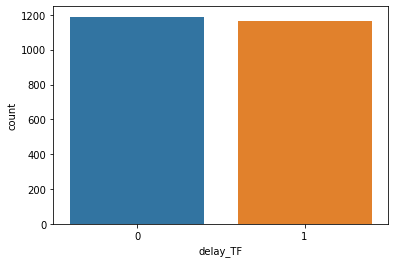

In [12]:
#第一階段target
%matplotlib inline

sns.countplot(airline["delay_TF"])

In [13]:
airline["delay_TF"].value_counts()#查看各類別資料筆數 0 : 1871 ; 1 : 44

0    1189
1    1165
Name: delay_TF, dtype: int64

In [14]:
#出發地機場

O_carrier_delay = pd.DataFrame()

for AP in list(airline['ORIGIN'].unique()):
    perc_delayed = len(airline[(airline['ORIGIN']==AP) & (airline['ARR_DELAY']>=15)].index)/len(airline[airline['ORIGIN']==AP].index)*100
    O_carrier_delay = O_carrier_delay.append({'ORIGIN':AP,'percent_delayed' : perc_delayed},ignore_index=True)

O_carrier_delay.sort_values(by = ['percent_delayed'],ascending=False,inplace=True)

# 目的地機場
D_carrier_delay = pd.DataFrame()

for AP in list(airline['DEST'].unique()):
    perc_delayed = len(airline[(airline['DEST']==AP) & (airline['ARR_DELAY']>=15)].index)/len(airline[airline['DEST']==AP].index)*100
    D_carrier_delay = D_carrier_delay.append({'DEST':AP,'percent_delayed' : perc_delayed},ignore_index=True)

D_carrier_delay.sort_values(by = ['percent_delayed'],ascending=False,inplace=True)

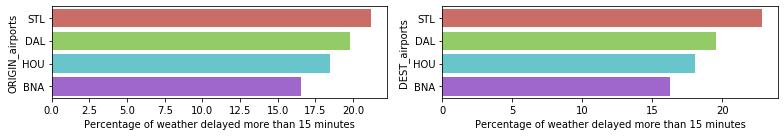

In [15]:
plt.figure(figsize=(11, 2))

plt.subplot(1,2,1) #一列兩行的第一張圖

color_pal = sns.color_palette("cubehelix", len(O_carrier_delay.index))
color_pal = color_pal[::-1]

g = sns.barplot(x="percent_delayed", y="ORIGIN", data=O_carrier_delay,palette="hls")
g.set_ylabel('ORIGIN_airports')
g.set_xlabel('Percentage of weather delayed more than 15 minutes')
fig = g.get_figure()


plt.subplot(1,2,2) #一列兩行的第二張圖
color_pal = sns.color_palette("cubehelix", len(D_carrier_delay.index))
color_pal = color_pal[::-1]

g = sns.barplot(x="percent_delayed", y="DEST", data=D_carrier_delay,palette="hls")
g.set_ylabel('DEST_airports')
g.set_xlabel('Percentage of weather delayed more than 15 minutes')
fig = g.get_figure()

plt.tight_layout()

In [16]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 233164 to 337397
Data columns (total 16 columns):
DAY_OF_WEEK            2354 non-null int64
ORIGIN                 2354 non-null object
DEST                   2354 non-null object
CRS_DEP_TIME           2354 non-null int64
DEP_TIME               2354 non-null float64
DEP_DELAY              2354 non-null float64
CRS_ARR_TIME           2354 non-null int64
ARR_TIME               2354 non-null float64
ARR_DELAY              2354 non-null float64
CRS_ELAPSED_TIME       2354 non-null float64
ACTUAL_ELAPSED_TIME    2354 non-null float64
AIR_TIME               2354 non-null float64
DISTANCE               2354 non-null float64
delay_TF               2354 non-null int32
DEP_HOUR               2354 non-null int64
ARR_HOUR               2354 non-null int64
dtypes: float64(8), int32(1), int64(5), object(2)
memory usage: 383.4+ KB


In [17]:
airline.drop(["CRS_DEP_TIME","DEP_TIME","DEP_DELAY","CRS_ARR_TIME","ARR_TIME","CRS_ELAPSED_TIME"
              ,"ACTUAL_ELAPSED_TIME","AIR_TIME"],axis=1,inplace=True)

In [18]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 233164 to 337397
Data columns (total 8 columns):
DAY_OF_WEEK    2354 non-null int64
ORIGIN         2354 non-null object
DEST           2354 non-null object
ARR_DELAY      2354 non-null float64
DISTANCE       2354 non-null float64
delay_TF       2354 non-null int32
DEP_HOUR       2354 non-null int64
ARR_HOUR       2354 non-null int64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 236.3+ KB


In [19]:
week_mapping = {1:"Mon",2:"Tue",3:"Wen",4:"Thur",5:"Fri",6:"Sat",7:"Sun"} 
airline['DAY_OF_WEEK'] = airline['DAY_OF_WEEK'].map(week_mapping)
airline

,DAY_OF_WEEK,ORIGIN,DEST,ARR_DELAY,DISTANCE,delay_TF,DEP_HOUR,ARR_HOUR
233164,Sun,BNA,HOU,7.0,670.0,1,18,20
233165,Sun,BNA,HOU,-10.0,670.0,0,8,10
233166,Sun,BNA,HOU,-11.0,670.0,0,10,11
233192,Sun,BNA,STL,-14.0,272.0,0,15,16
233453,Sun,DAL,HOU,-5.0,239.0,0,11,11
...,...,...,...,...,...,...,...,...
337393,Tue,STL,DAL,5.0,546.0,1,15,16
337394,Tue,STL,DAL,15.0,546.0,1,7,9
337395,Tue,STL,DAL,12.0,546.0,1,20,22
337396,Tue,STL,DAL,-4.0,546.0,0,6,8


In [20]:
# 1. 類別變數轉換
# 值之間沒有大小的意義，用One-Hot(使用get_dummies)

dummy = pd.get_dummies(airline[['DAY_OF_WEEK','ORIGIN','DEST']])


# 將轉換後產生的dataframe塞入原始df1，並刪除ORIGIN、DEST
airline = pd.concat([dummy,airline],axis=1)
airline.drop(['DAY_OF_WEEK','ORIGIN','DEST'],axis=1,inplace=True)

In [21]:
airline

,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,DAY_OF_WEEK_Thur,DAY_OF_WEEK_Tue,DAY_OF_WEEK_Wen,ORIGIN_BNA,ORIGIN_DAL,ORIGIN_HOU,ORIGIN_STL,DEST_BNA,DEST_DAL,DEST_HOU,DEST_STL,ARR_DELAY,DISTANCE,delay_TF,DEP_HOUR,ARR_HOUR
233164,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,7.0,670.0,1,18,20
233165,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-10.0,670.0,0,8,10
233166,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-11.0,670.0,0,10,11
233192,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,-14.0,272.0,0,15,16
233453,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-5.0,239.0,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,5.0,546.0,1,15,16
337394,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,15.0,546.0,1,7,9
337395,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,12.0,546.0,1,20,22
337396,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,-4.0,546.0,0,6,8


In [22]:
#將target欄位移至最後一欄
target_col = airline.pop(airline.columns[17])
airline.insert(19, target_col.name, target_col)

In [23]:
airline

,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,DAY_OF_WEEK_Thur,DAY_OF_WEEK_Tue,DAY_OF_WEEK_Wen,ORIGIN_BNA,ORIGIN_DAL,ORIGIN_HOU,ORIGIN_STL,DEST_BNA,DEST_DAL,DEST_HOU,DEST_STL,ARR_DELAY,DISTANCE,DEP_HOUR,ARR_HOUR,delay_TF
233164,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,7.0,670.0,18,20,1
233165,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-10.0,670.0,8,10,0
233166,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-11.0,670.0,10,11,0
233192,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,-14.0,272.0,15,16,0
233453,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-5.0,239.0,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,5.0,546.0,15,16,1
337394,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,15.0,546.0,7,9,1
337395,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,12.0,546.0,20,22,1
337396,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,-4.0,546.0,6,8,0


In [24]:
## 由於features中有不用標準化的欄位(dummy)，加上標準化、split的返回結果是ndarray，
## 因此要把不需要標準化的欄位獨立出來

# 1.切分成訓練集、驗證集
X = airline.iloc[:,:-1].values 
y = airline.iloc[:,-1].values

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1) 

# 2. 記錄不用標準化的欄位(type = dataframe)

# ndarray to df
Xtrainval = pd.DataFrame(X_trainval,columns = [str(i) for i in range(X_trainval.shape[1])])
Xtest = pd.DataFrame(X_test,columns = [str(i) for i in range(X_test.shape[1])])

## 目標df
X_trainval_temp = Xtrainval[["0","1","2","3","4","5",'6',"7","8","10","11","12","13","14"]]
X_test_temp = Xtest[["0","1","2","3","4","5",'6',"7","8","10","11","12","13","14"]]

# 3. df to ndarray
X_trainval_new = Xtrainval.to_numpy()
X_test_new = Xtest.to_numpy()

# 4. 標準化
sc = StandardScaler().fit(X_trainval)
x_train_std = sc.transform(X_trainval) ## 將規則用在訓練集
x_test_std = sc.transform(X_test) ## 將規則用在測試集

# 5. 將沒標準化的features放回df中
xtrainval = pd.DataFrame(X_trainval,columns = [str(i) for i in range(X_trainval.shape[1])])
xtest = pd.DataFrame(X_test,columns = [str(i) for i in range(X_test.shape[1])])

xtrainval.drop(["0","1","2","3","4","5",'6',"7","8","10","11","12","13","14"],axis=1,inplace=True)
xtest.drop(["0","1","2","3","4","5",'6',"7","8","10","11","12","13","14"],axis=1,inplace=True)

del X_trainval
del X_test

X_trainval = pd.concat([X_trainval_temp,xtrainval],axis=1)
X_test = pd.concat([X_test_temp,xtest],axis=1)

# df to ndarray
X_trainval = X_trainval.to_numpy()
X_test = X_test.to_numpy()

In [25]:
other_params = {'learning_rate':0.1,'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':0.1,'reg_lambda':1,
               'gamma':0.4,'objective':"reg:linear"}

cv_params = {'n_estimators': [200,300,400,500,600,700,800,900,1000,1100,1200]}


model = XGBClassifier(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='roc_auc',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval)  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)


#測試集
y_test_pred = gs.predict(X_test)
roc_auc = roc_auc_score(y_test, y_test_pred)
print("測試集roc_auc:",roc_auc)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   22.8s finished


[17:24:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 200}
最佳模型得分: 1.0
測試集roc_auc: 1.0


In [26]:
model = XGBClassifier() 
gs = GridSearchCV(model, cv_params, scoring='roc_auc',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval)  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)


#測試集
y_test_pred = gs.predict(X_test)
roc_auc = roc_auc_score(y_test, y_test_pred)
print("測試集roc_auc:",roc_auc)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s


参数的最佳取值：: {'n_estimators': 200}
最佳模型得分: 1.0
測試集roc_auc: 1.0


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   14.4s finished


In [27]:
model = XGBClassifier() 
model.fit(X_trainval,y_trainval)
y_test_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_test_pred)
print("測試集roc_auc:",roc_auc)

測試集roc_auc: 1.0


In [24]:
# 安裝所需套件
from sklearn import metrics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

## EDA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## 過採樣
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN


# 績效指標
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from collections import Counter

## 建模
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb

In [2]:
df2 = pd.read_csv(r"C:\Users\USER\Desktop\sample_data.csv")

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510806 entries, 0 to 510805
Data columns (total 28 columns):
YEAR                   510806 non-null int64
MONTH                  510806 non-null int64
DAY_OF_MONTH           510806 non-null int64
DAY_OF_WEEK            510806 non-null int64
UNIQUE_CARRIER         510806 non-null object
FL_NUM                 510806 non-null int64
ORIGIN_AIRPORT_ID      510806 non-null int64
ORIGIN                 510806 non-null object
ORIGIN_STATE_ABR       510806 non-null object
DEST_AIRPORT_ID        510806 non-null int64
DEST                   510806 non-null object
DEST_STATE_ABR         510806 non-null object
CRS_DEP_TIME           510806 non-null int64
DEP_TIME               506695 non-null float64
DEP_DELAY              506695 non-null float64
CRS_ARR_TIME           510806 non-null int64
ARR_TIME               506291 non-null float64
ARR_DELAY              505340 non-null float64
CRS_ELAPSED_TIME       510806 non-null float64
ACTUAL_ELAPSED_TIME

In [4]:
# 1. 刪除沒有天氣數據的出發地、目的地航班資料(列)

no_weather_data_o = df2[((df2['ORIGIN'] != "DAL") & (df2['ORIGIN'] != "HOU")
              & (df2['ORIGIN'] != "BNA") & (df2['ORIGIN'] != "STL"))]

df2 = df2.drop(no_weather_data_o.index)

no_weather_data_d = df2[((df2['DEST'] != "DAL") & (df2['DEST'] != "HOU")
              & (df2["DEST"] != "BNA") & (df2['DEST'] != "STL"))]


df2 = df2.drop(no_weather_data_d.index)

print(df2.shape)

(2376, 28)


In [5]:
# 2. 刪除用不到的欄位
df2.drop(["YEAR","MONTH",'UNIQUE_CARRIER','FL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','ORIGIN_STATE_ABR',"LATE_AIRCRAFT_DELAY"
              ,'DEST_STATE_ABR',"CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","DAY_OF_MONTH","Unnamed: 27"],axis=1,inplace=True)

# 3. 將DEP_TIME、DEP_DELAY、ARR_TIME、ARR_DELAY、ACTUAL_ELAPSED_TIME、AIR_TIME這些特徵有缺失值的資料整筆刪除
df2.dropna(subset=["DEP_TIME","DEP_DELAY","ARR_TIME","ARR_DELAY","ACTUAL_ELAPSED_TIME"
                       ,"AIR_TIME"],inplace=True)
print(df2.shape)

(2354, 13)


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 233164 to 337397
Data columns (total 13 columns):
DAY_OF_WEEK            2354 non-null int64
ORIGIN                 2354 non-null object
DEST                   2354 non-null object
CRS_DEP_TIME           2354 non-null int64
DEP_TIME               2354 non-null float64
DEP_DELAY              2354 non-null float64
CRS_ARR_TIME           2354 non-null int64
ARR_TIME               2354 non-null float64
ARR_DELAY              2354 non-null float64
CRS_ELAPSED_TIME       2354 non-null float64
ACTUAL_ELAPSED_TIME    2354 non-null float64
AIR_TIME               2354 non-null float64
DISTANCE               2354 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 257.5+ KB


In [7]:
df2.isnull().sum()

DAY_OF_WEEK            0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [8]:
## 8. 切割時間
## 時間格式(hhmm)，長度<=2 --> 0時 ; 長度=3:取前一碼;長度=4:取前兩碼

# 出發(時):CRS_DEP_TIME
df2["DEP_HOUR"] = df2["CRS_DEP_TIME"].apply(lambda x:0 if len(str(x))<=2 else int(str(x)[:1]) if len(str(x))==3 else int(str(x)[:2]))
# 抵達(時):ARR_TIME
df2["ARR_HOUR"] = df2["ARR_TIME"].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
df2["ARR_HOUR"] = df2["ARR_HOUR"].apply(lambda x:0 if x==24 else x)

In [9]:
df2

,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DEP_HOUR,ARR_HOUR
233164,7,BNA,HOU,1830,1845.0,15.0,2025,2032.0,7.0,115.0,107.0,93.0,670.0,18,20
233165,7,BNA,HOU,840,840.0,0.0,1035,1025.0,-10.0,115.0,105.0,90.0,670.0,8,10
233166,7,BNA,HOU,1000,958.0,-2.0,1155,1144.0,-11.0,115.0,106.0,93.0,670.0,10,11
233192,7,BNA,STL,1545,1542.0,-3.0,1650,1636.0,-14.0,65.0,54.0,44.0,272.0,15,16
233453,7,DAL,HOU,1100,1100.0,0.0,1200,1155.0,-5.0,60.0,55.0,40.0,239.0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,2,STL,DAL,1515,1526.0,11.0,1650,1655.0,5.0,95.0,89.0,79.0,546.0,15,16
337394,2,STL,DAL,750,805.0,15.0,925,940.0,15.0,95.0,95.0,82.0,546.0,7,9
337395,2,STL,DAL,2040,2053.0,13.0,2210,2222.0,12.0,90.0,89.0,76.0,546.0,20,22
337396,2,STL,DAL,640,637.0,-3.0,815,811.0,-4.0,95.0,94.0,78.0,546.0,6,8


In [10]:
df2.drop(["CRS_DEP_TIME","DEP_TIME","DEP_DELAY","CRS_ARR_TIME","ARR_TIME","CRS_ELAPSED_TIME"
              ,"ACTUAL_ELAPSED_TIME","AIR_TIME"],axis=1,inplace=True)

In [11]:
df2

,DAY_OF_WEEK,ORIGIN,DEST,ARR_DELAY,DISTANCE,DEP_HOUR,ARR_HOUR
233164,7,BNA,HOU,7.0,670.0,18,20
233165,7,BNA,HOU,-10.0,670.0,8,10
233166,7,BNA,HOU,-11.0,670.0,10,11
233192,7,BNA,STL,-14.0,272.0,15,16
233453,7,DAL,HOU,-5.0,239.0,11,11
...,...,...,...,...,...,...,...
337393,2,STL,DAL,5.0,546.0,15,16
337394,2,STL,DAL,15.0,546.0,7,9
337395,2,STL,DAL,12.0,546.0,20,22
337396,2,STL,DAL,-4.0,546.0,6,8


In [12]:
week_mapping = {1:"Mon",2:"Tue",3:"Wen",4:"Thur",5:"Fri",6:"Sat",7:"Sun"} 
df2['DAY_OF_WEEK'] = df2['DAY_OF_WEEK'].map(week_mapping)
df2

,DAY_OF_WEEK,ORIGIN,DEST,ARR_DELAY,DISTANCE,DEP_HOUR,ARR_HOUR
233164,Sun,BNA,HOU,7.0,670.0,18,20
233165,Sun,BNA,HOU,-10.0,670.0,8,10
233166,Sun,BNA,HOU,-11.0,670.0,10,11
233192,Sun,BNA,STL,-14.0,272.0,15,16
233453,Sun,DAL,HOU,-5.0,239.0,11,11
...,...,...,...,...,...,...,...
337393,Tue,STL,DAL,5.0,546.0,15,16
337394,Tue,STL,DAL,15.0,546.0,7,9
337395,Tue,STL,DAL,12.0,546.0,20,22
337396,Tue,STL,DAL,-4.0,546.0,6,8


In [13]:
# 1. 類別變數轉換
# 值之間沒有大小的意義，用One-Hot(使用get_dummies)

dummy = pd.get_dummies(df2[['DAY_OF_WEEK','ORIGIN','DEST']])


# 將轉換後產生的dataframe塞入原始df1，並刪除ORIGIN、DEST
df2 = pd.concat([dummy,df2],axis=1)
df2.drop(['DAY_OF_WEEK','ORIGIN','DEST'],axis=1,inplace=True)

In [14]:
df2

,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,DAY_OF_WEEK_Thur,DAY_OF_WEEK_Tue,DAY_OF_WEEK_Wen,ORIGIN_BNA,ORIGIN_DAL,ORIGIN_HOU,ORIGIN_STL,DEST_BNA,DEST_DAL,DEST_HOU,DEST_STL,ARR_DELAY,DISTANCE,DEP_HOUR,ARR_HOUR
233164,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,7.0,670.0,18,20
233165,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-10.0,670.0,8,10
233166,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-11.0,670.0,10,11
233192,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,-14.0,272.0,15,16
233453,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-5.0,239.0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,5.0,546.0,15,16
337394,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,15.0,546.0,7,9
337395,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,12.0,546.0,20,22
337396,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,-4.0,546.0,6,8


In [15]:
#將target欄位移至最後一欄
target_col = df2.pop(df2.columns[15])
df2.insert(18, target_col.name, target_col)

In [16]:
df2

,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,DAY_OF_WEEK_Thur,DAY_OF_WEEK_Tue,DAY_OF_WEEK_Wen,ORIGIN_BNA,ORIGIN_DAL,ORIGIN_HOU,ORIGIN_STL,DEST_BNA,DEST_DAL,DEST_HOU,DEST_STL,DISTANCE,DEP_HOUR,ARR_HOUR,ARR_DELAY
233164,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,670.0,18,20,7.0
233165,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,670.0,8,10,-10.0
233166,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,670.0,10,11,-11.0
233192,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,272.0,15,16,-14.0
233453,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,239.0,11,11,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337393,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,15,16,5.0
337394,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,7,9,15.0
337395,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,20,22,12.0
337396,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,6,8,-4.0


In [17]:
df2.isnull().sum()

DAY_OF_WEEK_Fri     0
DAY_OF_WEEK_Mon     0
DAY_OF_WEEK_Sat     0
DAY_OF_WEEK_Sun     0
DAY_OF_WEEK_Thur    0
DAY_OF_WEEK_Tue     0
DAY_OF_WEEK_Wen     0
ORIGIN_BNA          0
ORIGIN_DAL          0
ORIGIN_HOU          0
ORIGIN_STL          0
DEST_BNA            0
DEST_DAL            0
DEST_HOU            0
DEST_STL            0
DISTANCE            0
DEP_HOUR            0
ARR_HOUR            0
ARR_DELAY           0
dtype: int64

In [18]:
## 將沒延誤的資料刪除
# 4. 將延誤原因與"天氣"無關的航班資料刪除(先抓)
not_delay = df2[(df2["ARR_DELAY"]<=0)]

# 4. 將延誤原因與"天氣"無關的航班資料刪除(再刪)
a = df2.drop(not_delay.index)
print(a.shape) ##因天氣延誤&正常飛行的資料筆數為1915

(1165, 19)


In [19]:
a

,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,DAY_OF_WEEK_Thur,DAY_OF_WEEK_Tue,DAY_OF_WEEK_Wen,ORIGIN_BNA,ORIGIN_DAL,ORIGIN_HOU,ORIGIN_STL,DEST_BNA,DEST_DAL,DEST_HOU,DEST_STL,DISTANCE,DEP_HOUR,ARR_HOUR,ARR_DELAY
233164,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,670.0,18,20,7.0
233462,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,239.0,19,20,24.0
233501,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,546.0,14,16,20.0
233502,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,546.0,16,18,22.0
233504,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,546.0,13,14,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337390,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,19,21,47.0
337392,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,10,11,2.0
337393,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,15,16,5.0
337394,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,546.0,7,9,15.0


In [20]:
## 由於features中有不用標準化的欄位(dummy)，加上標準化、split的返回結果是ndarray，
## 因此要把不需要標準化的欄位獨立出來

# 1.切分成訓練集、驗證集
X = a.iloc[:,:-1].values 
y = a.iloc[:,-1].values
y = np.log1p(y)


X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10) 

# 2. 記錄不用標準化的欄位(type = dataframe)

# ndarray to df
Xtrainval = pd.DataFrame(X_trainval,columns = [str(i) for i in range(X_trainval.shape[1])])
Xtest = pd.DataFrame(X_test,columns = [str(i) for i in range(X_test.shape[1])])

## 目標df
X_trainval_temp = Xtrainval[["0","1","2","3","4","5",'6',"8","9","10","11","12","13","14"]]
X_test_temp = Xtest[["0","1","2","3","4","5",'6',"8","9","10","11","12","13","14"]]

# 3. df to ndarray
X_trainval_new = Xtrainval.to_numpy()
X_test_new = Xtest.to_numpy()

# 4. 標準化
sc = StandardScaler().fit(X_trainval)
x_train_std = sc.transform(X_trainval) ## 將規則用在訓練集
x_test_std = sc.transform(X_test) ## 將規則用在測試集

# 5. 將沒標準化的features放回df中
xtrainval = pd.DataFrame(X_trainval,columns = [str(i) for i in range(X_trainval.shape[1])])
xtest = pd.DataFrame(X_test,columns = [str(i) for i in range(X_test.shape[1])])

xtrainval.drop(["0","1","2","3","4","5",'6',"8","9","10","11","12","13","14"],axis=1,inplace=True)
xtest.drop(["0","1","2","3","4","5",'6',"8","9","10","11","12","13","14"],axis=1,inplace=True)

del X_trainval
del X_test

X_trainval = pd.concat([X_trainval_temp,xtrainval],axis=1)
X_test = pd.concat([X_test_temp,xtest],axis=1)

# df to ndarray(為了進行SMOTE&CV)
X_trainval = X_trainval.to_numpy()
X_test = X_test.to_numpy()

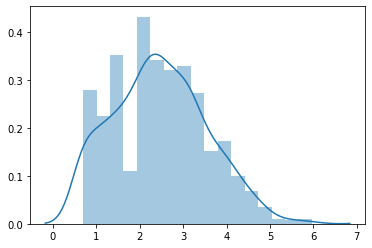

In [22]:
sns.distplot(y_trainval)
#df2.loc[:,"WEATHER_DELAY"] = np.log1p(df2["WEATHER_DELAY"])
plt.show()

In [25]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}

cv_params = {'n_estimators': [50,100,200,300,400,500,600]}


model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.7s finished


[14:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 400}
最佳模型得分: 0.33055218649320695


In [29]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}

cv_params = {'min_child_weight': [1,2,3,4,5],"max_depth":[3,4,5,6,7]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.4s finished


[14:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'max_depth': 3, 'min_child_weight': 3}
最佳模型得分: 0.33562188347236777


In [30]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}


cv_params = {"gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    4.9s finished


[14:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'gamma': 0.8}
最佳模型得分: 0.3450829701867052


In [31]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.8,'objective':"reg:linear"}

cv_params = {"subsample":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    4.4s finished


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'subsample': 0.8}
最佳模型得分: 0.3450829701867052


In [32]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.8,'objective':"reg:linear"}

cv_params = {"colsample_bytree":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


[14:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'colsample_bytree': 1}
最佳模型得分: 0.35420920570555153


In [33]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 1,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.8,'objective':"reg:linear"}

cv_params = {"reg_alpha":[0,1,2,3,4,5,6,7,8,9,10]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    5.6s finished


[15:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_alpha': 0}
最佳模型得分: 0.35874249133782127


In [34]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 1,'colsample_bylevel':1,'reg_alpha':0,'reg_lambda':1,
               'gamma':0.8,'objective':"reg:linear"}


cv_params = {"reg_lambda":[0.05, 0.1, 1, 2, 3]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.0s finished


[15:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_lambda': 1}
最佳模型得分: 0.35874249133782127


In [35]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 1,'colsample_bylevel':1,'reg_alpha':0,'reg_lambda':1,
               'gamma':0.8,'objective':"reg:linear"}


cv_params = {"learning_rate":[0.01, 0.05, 0.07, 0.1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


[15:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'learning_rate': 0.1}
最佳模型得分: 0.35874249133782127


In [36]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 1,'colsample_bylevel':1,'reg_alpha':0,'reg_lambda':1,
               'gamma':0.8,'objective':"reg:linear"}

model.fit(X_trainval,y_trainval)


# 訓練集
y_trainval_pred = model.predict(X_trainval)
mse = np.sqrt(mean_squared_error(y_trainval, y_trainval_pred))
print("訓練集mes:",mse)
r2 = metrics.r2_score(y_trainval,y_trainval_pred)
print("訓練集r2:",r2)
print("-----------------------------")

#測試集
y_test_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("測試集mes:",mse)
r2 = metrics.r2_score(y_test, y_test_pred)
print("測試集r2:",r2)

[15:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
訓練集mes: 0.6872956762988747
訓練集r2: 0.5910196332987395
-----------------------------
測試集mes: 0.8481776244142936
測試集r2: 0.41930599880065356


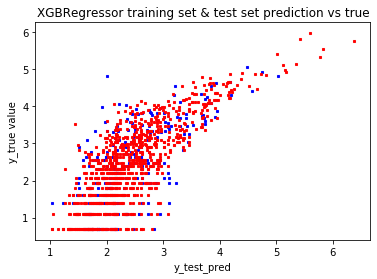

In [37]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(y_test_pred,y_test,marker='X',s=5,c='blue')

plt.scatter(y_trainval_pred,y_trainval,marker='X',s=5,c='red')

plt.title('XGBRegressor training set & test set prediction vs true')

plt.xlabel('y_test_pred')

plt.ylabel('y_true value')

plt.show()